In [1]:
import numpy             as np
import pandas            as pd
import seaborn as sns
import matplotlib.pyplot as plt

import lux
import prince
from scipy import stats
from datetime import date
from datetime import datetime
from datetime import timedelta

### Lectura dela base de datos 

In [2]:
url='application_record.csv'
df = pd.read_csv(url)
df1= pd.read_csv('credit_record.csv')

In [3]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
df1

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Cambiar nombre de las columnas

In [5]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [6]:
renombrar = {'CODE_GENDER': 'GENERO',
            'FLAG_OWN_CAR': 'VEHICULO',
            'FLAG_OWN_REALTY': 'PROPIEDADES',
            'CNT_CHILDREN': 'CANT_HIJOS',
            'AMT_INCOME_TOTAL': 'ING_TOTAL_ANUAL',
            'NAME_INCOME_TYPE': 'ORIGEN_INGRESO',
            'NAME_EDUCATION_TYPE': 'NIV_ESTUDIO',
            'NAME_FAMILY_STATUS':  'ESTADO_CIVIL',
            'NAME_HOUSING_TYPE': 'T_VIVIENDA',
            'DAYS_BIRTH' : 'FECHA_NACIMIENTO',
            'DAYS_EMPLOYED': 'EMPLEADO',
            'FLAG_MOBIL': 'TIENE_CEL',
            'FLAG_WORK_PHONE': 'TIENE_TEL_TRJ',
            'FLAG_PHONE': 'TIENE_TELFIJO',
            'FLAG_EMAIL': 'TIENE_EMAIL',
            'OCCUPATION_TYPE':'T_OCUPACION',
            'CNT_FAM_MEMBERS': 'CANT_FAM'
           }
df.columns = [renombrar.get(x, x) for x in df.columns] 


In [7]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Arreglar datos.

In [8]:
renombrar_ori_ingreso = {'Working': 'Trabajador',
            'Commercial associate': 'Asociado comercial',
            'Pensioner': 'Pensionado',
            'State servant': 'Servidor publico',
            'Student': 'Estudiante'
           }
renombrar_niv_estudio = {'Higher education': 'Educación superior',
            'Secondary / secondary special': 'Especial secundario/secundario',
            'Incomplete higher': 'Superior incompleto',
            'Lower secondary': 'Secundaria inferior',
            'Academic degree': 'Grado académico'
           }
renombrar_estado_civil = {'Civil marriage': 'Matrimonio civil',
            'Married': 'Casado',
            'Single / not married': 'Soltero',
            'Separated': 'Separado',
            'Widow': 'Viudo'
           }
renombrar_vivienda = {'Rented apartment': 'Apartamento alquilado',
            'House / apartment': 'Casa/apartamento',
            'Municipal apartment': 'Piso municipal',
            'Co-op apartment': 'Apt compartido',
            'Office apartment': 'Apartamento oficina',
            'With parents': 'Con padres'
           }
renombrar_ocupacion = {'Security staff': 'Personal de seguridad',
            'Sales staff': 'Personal de ventas',
            'Accountants': 'Contadores',
            'Laborers': 'Trabajadores',
            'Managers': 'Gerentes',
            'Drivers': 'Conductores',
            'Core staff': 'Personal básico',
            'High skill tech staff':  'Personal de alta tecnología de alta cualificación',
            'Cleaning staff': 'Personal de limpieza',
            'Private service staff' : 'Personal de servicio privado',
            'Cooking staff': 'Personal de cocina',
            'Low-skill Laborers': 'Trabajadores de baja cualificación',
            'Medicine staff': 'Personal de medicina',
            'Secretaries': 'Secretarios',
            'Waiters/barmen staff': 'Camareros',
            'HR staff':'Personal de recursos humanos',
            'Realty agents': 'Agentes de bienes raíces',
            'IT staff': 'Personal de TI'
           }
df.ORIGEN_INGRESO = [renombrar_ori_ingreso.get(x, x) for x in df.ORIGEN_INGRESO]
df.NIV_ESTUDIO = [renombrar_niv_estudio.get(x, x) for x in df.NIV_ESTUDIO] 
df.ESTADO_CIVIL = [renombrar_estado_civil.get(x, x) for x in df.ESTADO_CIVIL] 
df.T_VIVIENDA = [renombrar_vivienda.get(x, x) for x in df.T_VIVIENDA] 
df.T_OCUPACION = [renombrar_ocupacion.get(x, x) for x in df.T_OCUPACION] 

In [9]:
fecha_final = datetime(2020,1, 1)
df.FECHA_NACIMIENTO = [fecha_final - timedelta(days=-(n)) for n in df.FECHA_NACIMIENTO]
df.VEHICULO = [True if n=='Y' else False for n in df.VEHICULO]
df.PROPIEDADES = [True if n=='Y' else False for n in df.PROPIEDADES]

In [10]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
df.describe().round(2)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
df.dtypes

ID                           int64
GENERO                      object
VEHICULO                      bool
PROPIEDADES                   bool
CANT_HIJOS                   int64
ING_TOTAL_ANUAL            float64
ORIGEN_INGRESO              object
NIV_ESTUDIO                 object
ESTADO_CIVIL                object
T_VIVIENDA                  object
FECHA_NACIMIENTO    datetime64[ns]
EMPLEADO                     int64
TIENE_CEL                    int64
TIENE_TEL_TRJ                int64
TIENE_TELFIJO                int64
TIENE_EMAIL                  int64
T_OCUPACION                 object
CANT_FAM                   float64
dtype: object


In [13]:
df
df1 = pd.DataFrame(data = df
             , columns = ['GENERO', 'ORIGEN_INGRESO', 'NIV_ESTUDIO', 'ESTADO_CIVIL',
       'T_VIVIENDA', 'T_OCUPACION'])

In [14]:
mca = prince.MCA(
    n_components=4,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto')
mca = mca.fit(df1)

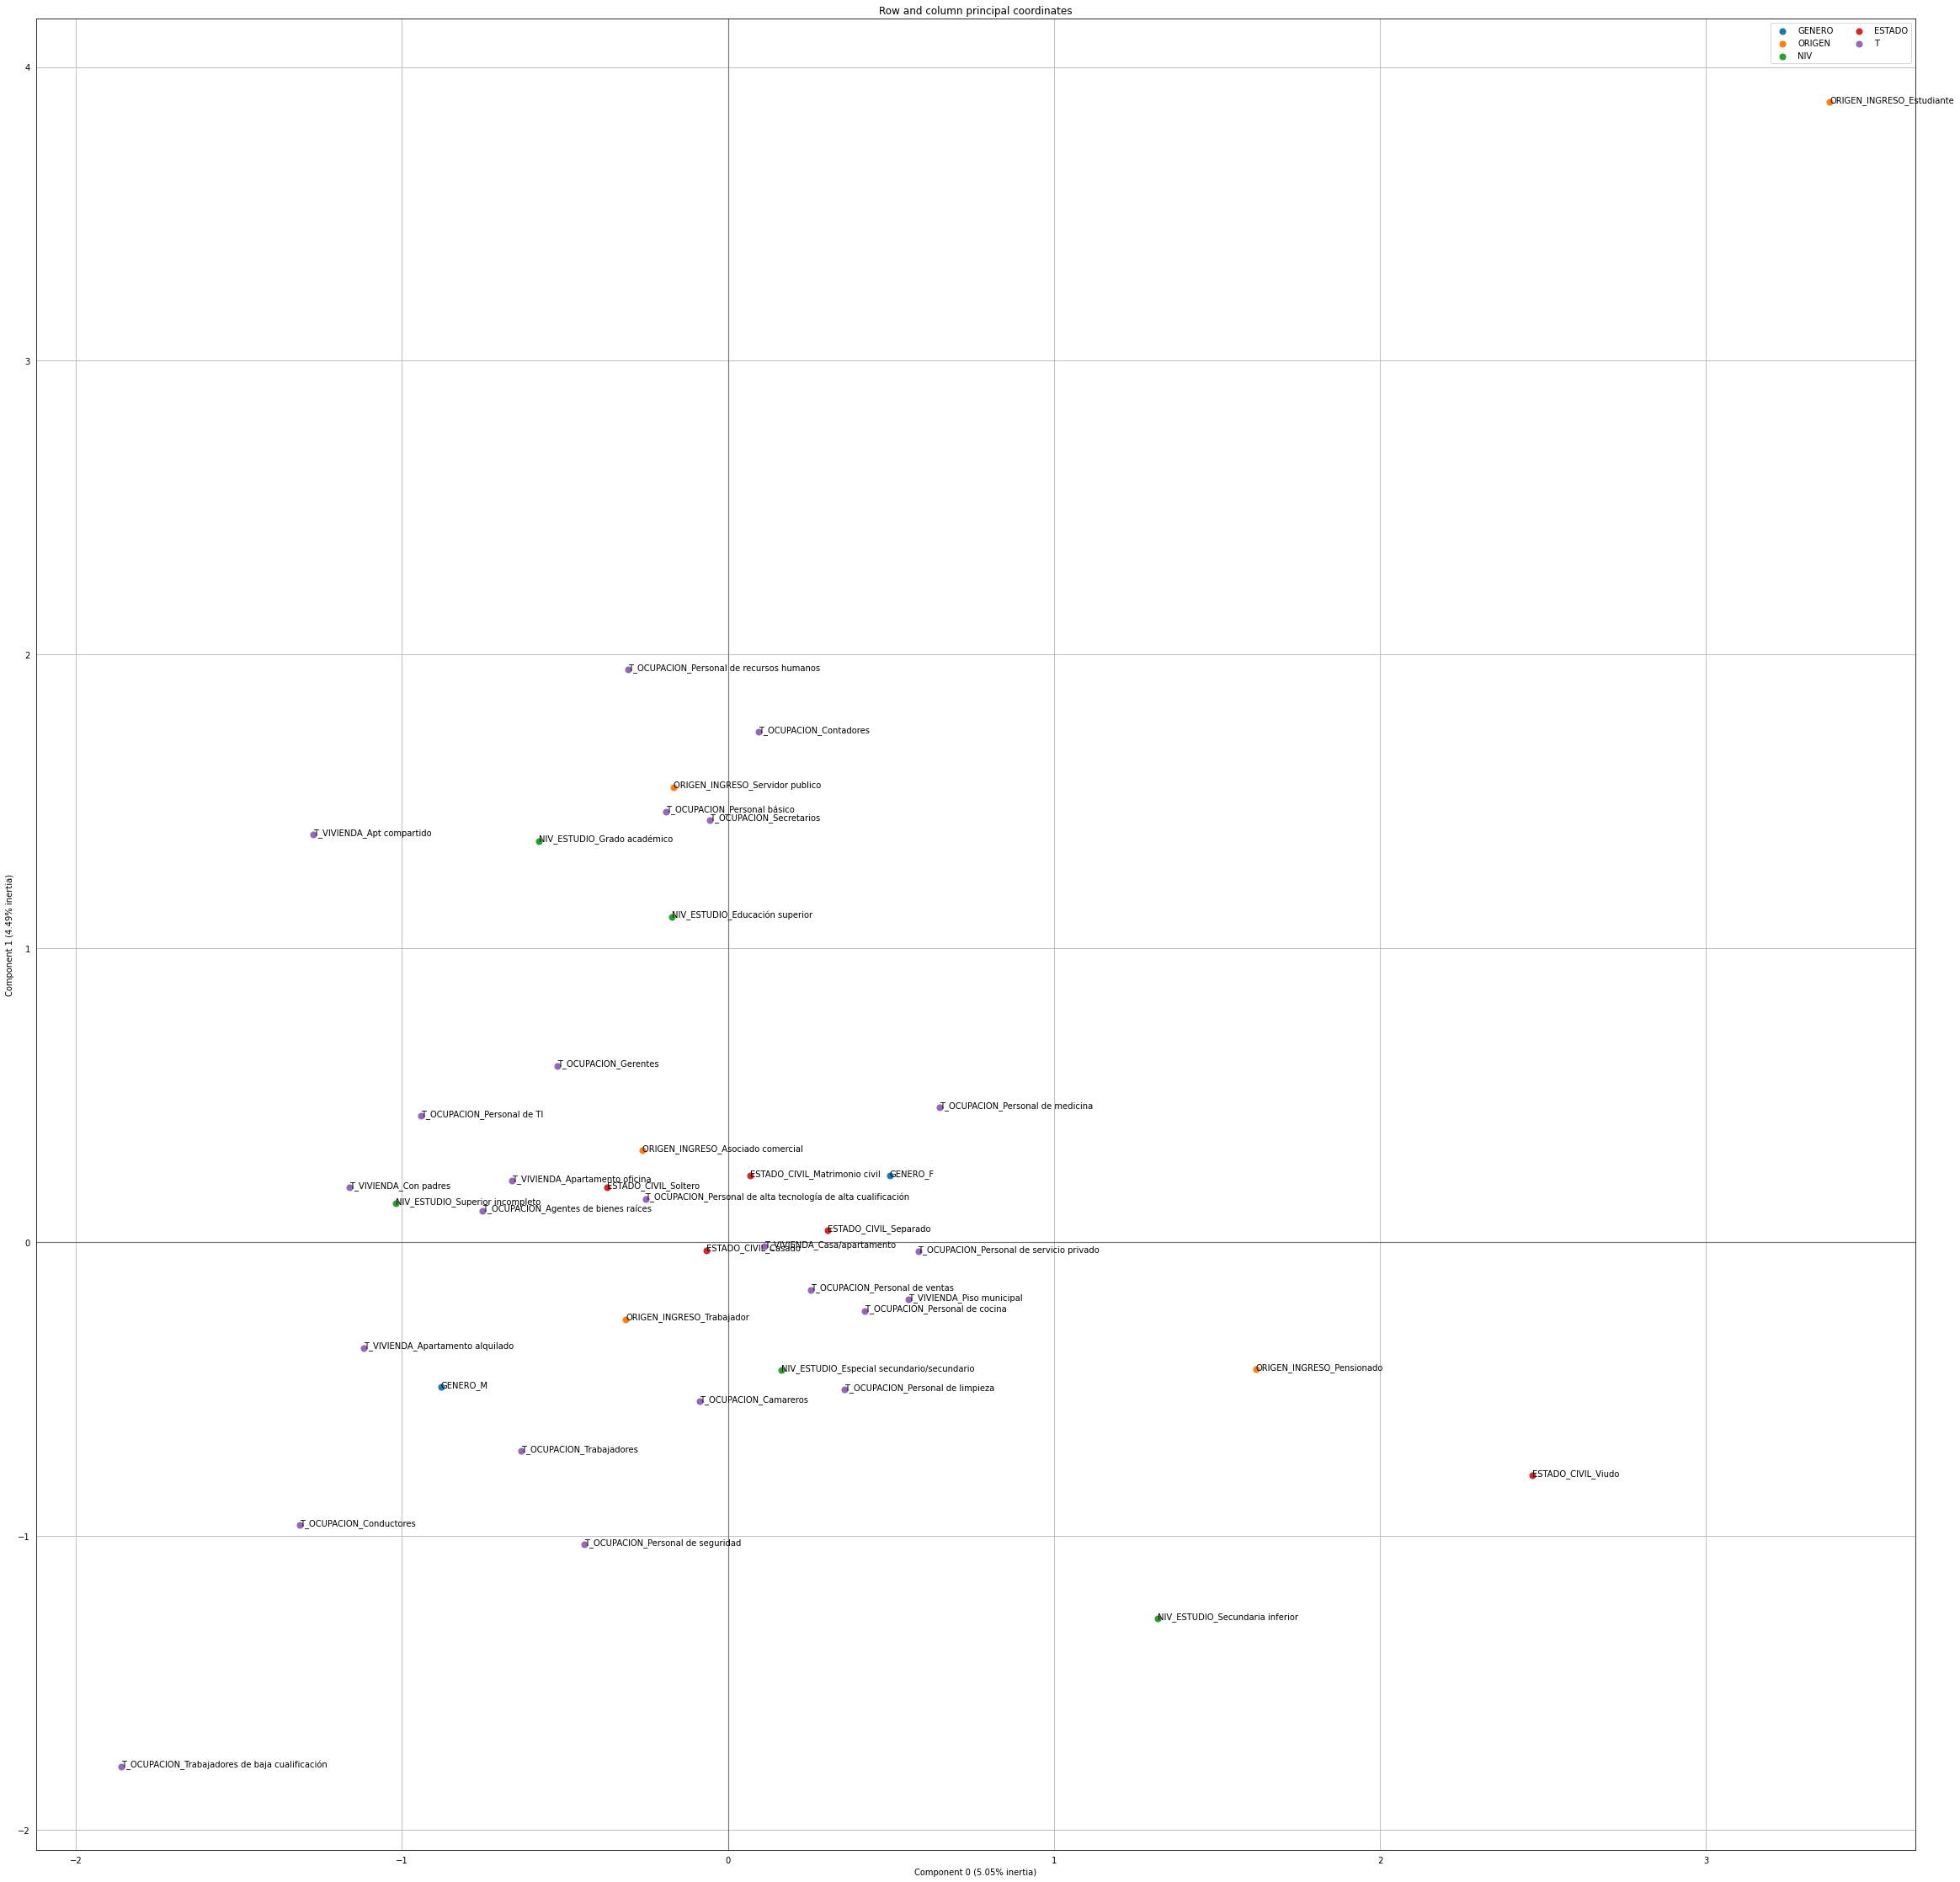

In [15]:
ax = mca.plot_coordinates(
    X=df1,
    ax=None,
    x_component=0,
    y_component=1,
    figsize=(40, 40),
    show_row_points=False,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=50,
    show_column_labels=True,
    legend_n_cols=2)

In [16]:
mca.explained_inertia_

[0.05050162374005143,
 0.04485694335801154,
 0.036689153159290264,
 0.03400727079494288]

### Correlacion

In [17]:
def correlacion_spearman(datos,anotacion,ancho=20,alto=15):

    cuanti=datos.select_dtypes(np.number)

    correlacion_global=datos.corr(method='spearman')


    rho,p_value = stats.spearmanr(cuanti)
    rho = list(p_value)
    for i in range(len(p_value)):
        p_value[i]= list(p_value[i])
    p_value = pd.DataFrame(p_value)
    Significancia = p_value < 0.05


    mask =np.triu(correlacion_global, k=1)

    sns.set(font_scale=1.7)
    fig, scatter = plt.subplots(figsize = (ancho,alto))
    sns.heatmap(data=correlacion_global.round(decimals=2), 
                xticklabels=correlacion_global.columns,
                yticklabels=correlacion_global.columns,
                cmap='RdBu_r',
                annot=anotacion,
                linewidth=0.5,
                mask=mask)

C:\Users\smypi\Anaconda3\envs\SegundoSemestre\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning:invalid value encountered in true_divide
C:\Users\smypi\Anaconda3\envs\SegundoSemestre\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning:invalid value encountered in true_divide


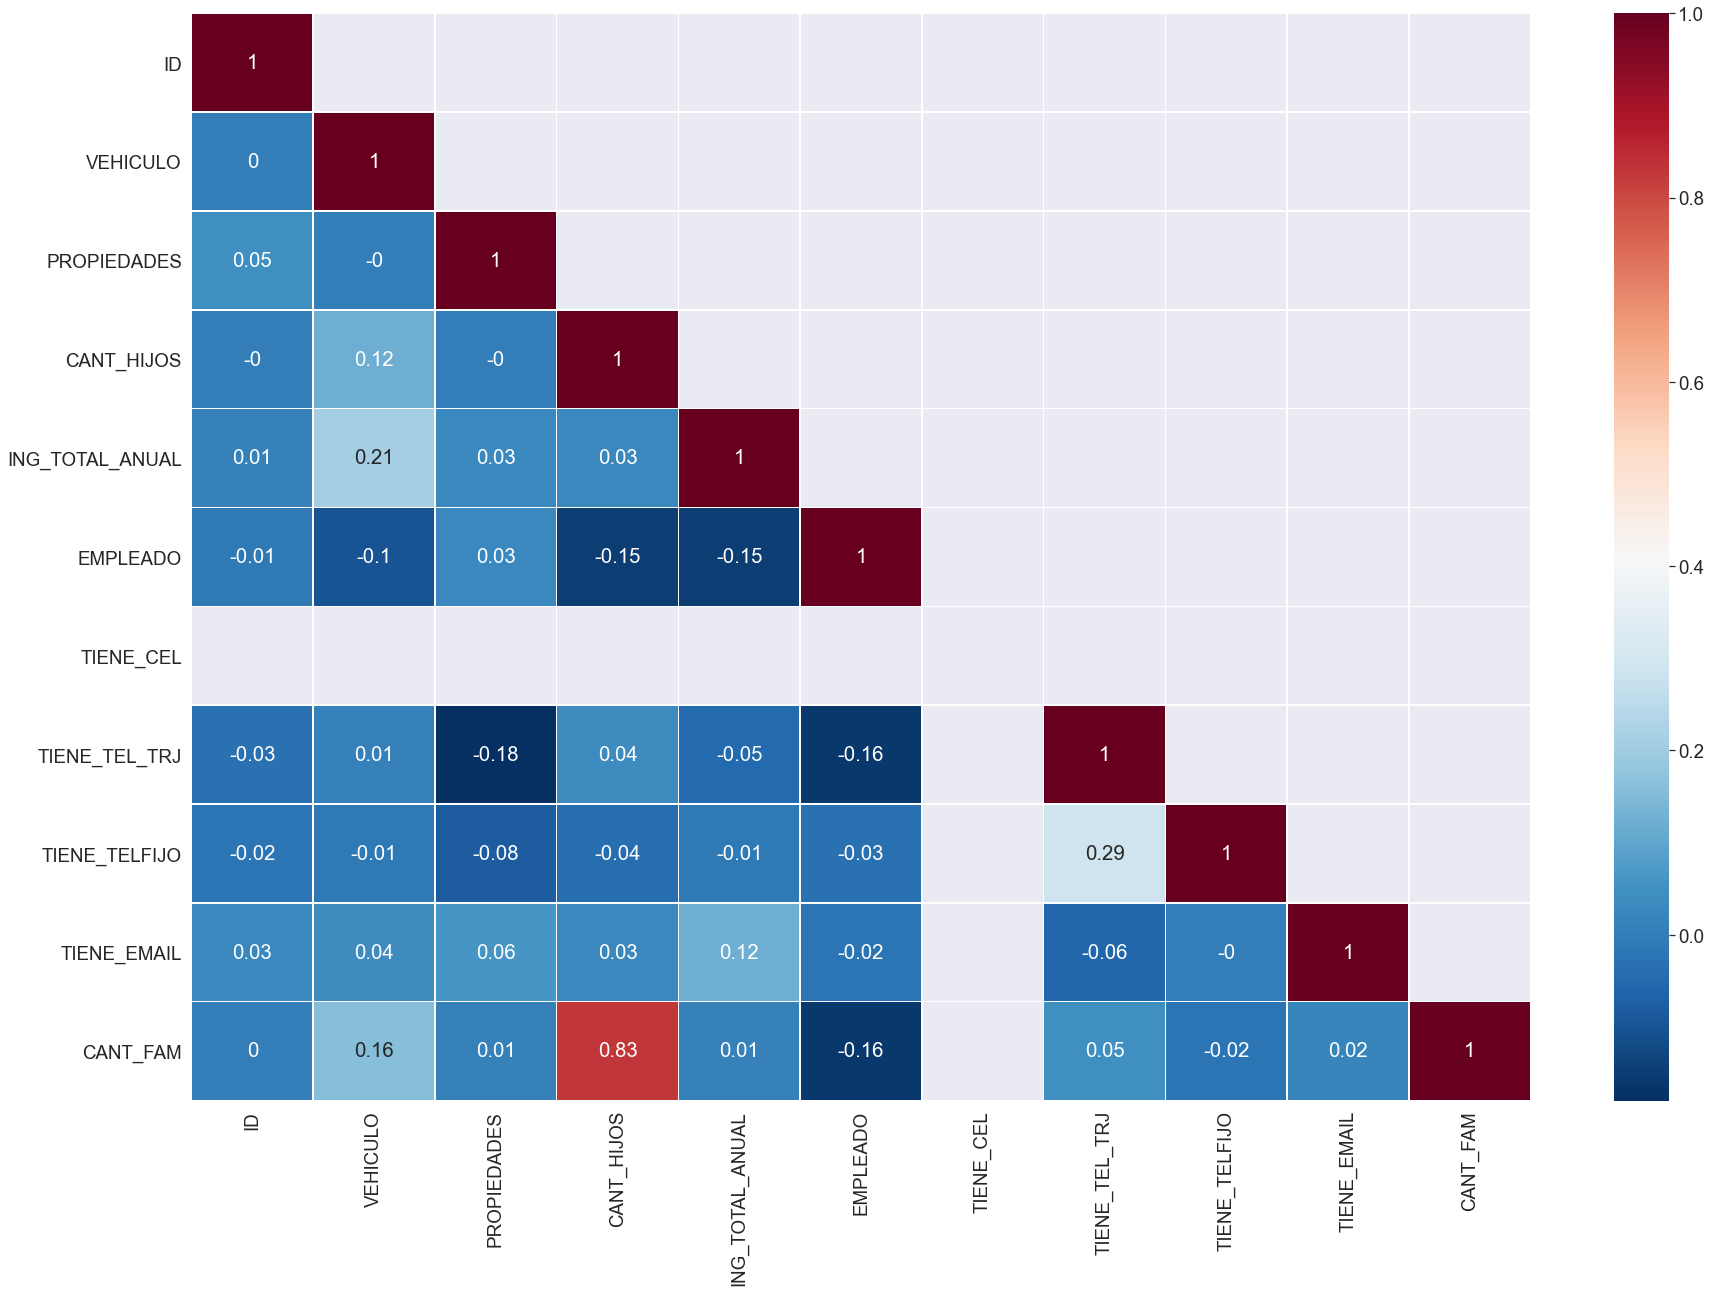

In [18]:
correlacion_spearman(df,True,30,20)